# Crop Recommendation

This notebook builds a machine learning model to recommend crop based on soil and climate features.

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Data


In [49]:
# Load the crop recommendation dataset
data = pd.read_csv("../data/crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Dataset Structure

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2199 non-null   int64  
 1   P            2199 non-null   int64  
 2   K            2199 non-null   int64  
 3   temperature  2199 non-null   float64
 4   humidity     2199 non-null   float64
 5   ph           2199 non-null   float64
 6   rainfall     2199 non-null   float64
 7   crop         2199 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Statistical Summary

In [51]:
data.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,crop
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.534334,53.359709,48.162347,25.616437,71.483958,6.469733,103.475205,NaN
std,36.916619,32.993082,50.655633,5.064892,22.268641,0.774023,54.968219,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.768393,60.255364,5.972052,64.544549,NaN
50%,37.000000,51.000000,32.000000,25.600337,80.474764,6.425420,94.953353,NaN
75%,84.000000,68.000000,49.000000,28.561810,89.960531,6.923776,124.308842,NaN


### Data Quality Checks

In [52]:
# Check for missing values and duplicate rows to ensure data quality
print("Missing values in each column:\n", data.isnull().sum())
print("Duplicate rows:", data.duplicated().sum())

Missing values in each column:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64
Duplicate rows: 0


### Feature Cardinality

In [53]:
# Count unique values for each column to understand feature cardinality
data.nunique()

N               137
P               117
K                73
temperature    2199
humidity       2199
ph             2199
rainfall       2199
crop             22
dtype: int64

### Correlation Analysis

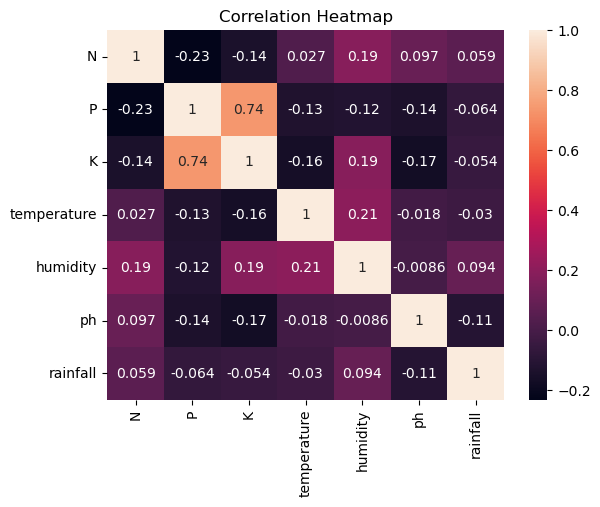

In [54]:
# Create a heatmap to visualize correlations between numerical features and target variable
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


## 3. Data Preparation
Prepare the data for model training by splitting into features and target, and dividing into train and test sets.

In [55]:
# Split the data into features (X) and target variable (y)
X = data.drop('crop', axis=1)
y = data['crop']

# Train-test split: 80% training, 20% testing for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of split data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Shape of split data:
X_train shape: (1759, 7)
y_train shape: (1759,)
X_test shape: (440, 7)
y_test shape: (440,)


## 4. Model Training

In [56]:
# Create and train Random Forest Classifier model
# Random Forest handles non-linear relationships and feature interactions well
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nModel Trained Successfully")


Model Trained Successfully


### Generate Predictions

In [57]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

## 5. Model Evaluation
Evaluate model performance using various classification metrics.

In [58]:
# Calculate model accuracy on the test set
# Accuracy = (correct predictions / total predictions)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.990909090909091


### Confusion Matrix

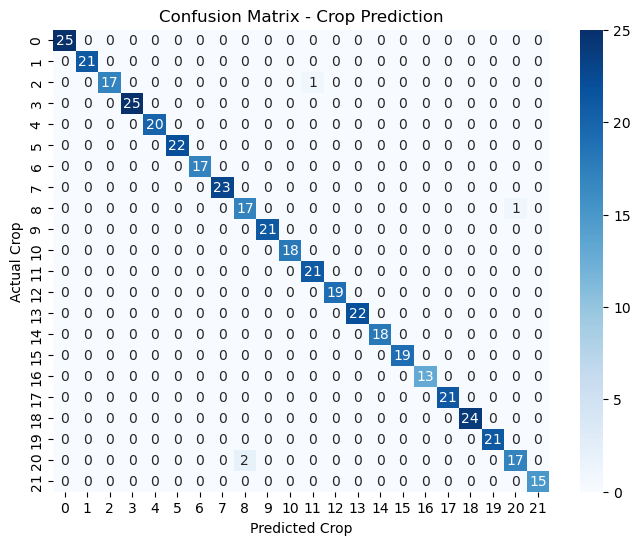

In [68]:
# Create confusion matrix to analyze prediction performance per crop class
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.title("Confusion Matrix - Crop Prediction")
plt.show()

### Classification Report

In [60]:
# Display detailed classification metrics (precision, recall, F1-score) for each crop class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.94      0.97        18
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        23
        jute       0.89      0.94      0.92        18
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        18
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        13
  

## 6. Visualization & Feature Importance
Analyze which features are most important for crop prediction.

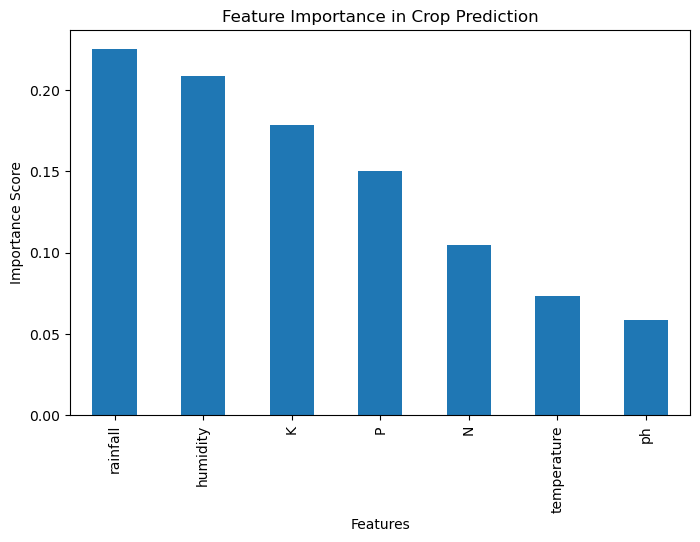

In [66]:
# Extract and display feature importances from the trained model
# Higher importance scores indicate features that are more useful for predictions
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))

plt.title("Feature Importance in Crop Prediction")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

## 7. Test Prediction
Make predictions on sample data to demonstrate model inference capability.

In [62]:
# Test prediction on sample data
# Example: [N, P, K, temperature, humidity, pH, rainfall]
sample_data = np.array([[89, 60, 19, 25.19, 66.69, 5.91, 78.07]])
predicted_crop = model.predict(sample_data)
print("\nPredicted Crop for Sample Data:", predicted_crop[0])


Predicted Crop for Sample Data: maize


c:\Users\hardi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 8. Save Model
Save the trained model for future use and deployment.

In [ ]:
import joblib
joblib.dump(model, '../models/crop_recommendation_model.pkl')
print("\nCrop Recommendation Model saved successfully!")


Crop Recommendation Model saved successfully!
